# SciANN-Regression.py  
An illustrain to use SciANN simple linear and quadratic curve-fitting.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import sciann as sn

---------------------- SCIANN 0.6.3.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 


# SciANN for Linear Regression  
线性函数回归问题；  
采用神经网络NN拟合来自如下方程的数据：    
$$y=2x+1+\epsilon, \epsilon \sim N(0,\sigma^2)=\sigma N(0,1)$$

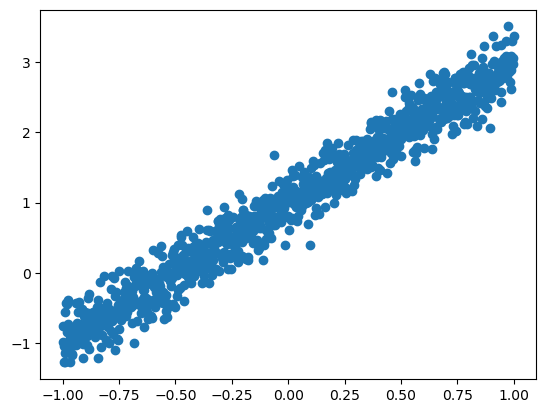

In [2]:
x_data = np.linspace(-1, 1, 1000)
y_data = 2*x_data + 1
y_noise = 0.2*np.std(y_data)*np.random.randn(1000)

plt.scatter(x_data, y_data + y_noise)
plt.show()

## Step 1
首先定义一个和目标相同输入输出的神经网络，最简单的网络是线性的，没有任何隐藏层。

In [3]:
x = sn.Variable('x')
o = sn.Field('y')
y = sn.Functional(o, x)
# 可以通过下面语句检查初始值和网络权重和偏置：
y.get_weights()

[[array([[-0.00584359]], dtype=float32), array([1.7245951], dtype=float32)]]

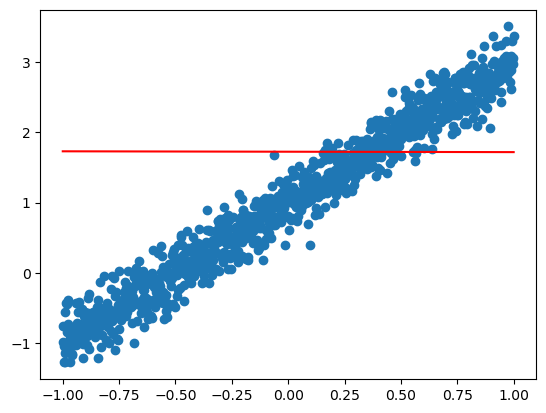

In [ ]:
# 通过eval函数评估函数（输出）
y_pred = y.eval(x_data)

plt.scatter(x_data, y_data + y_noise)
plt.plot(x_data, y_pred, 'r')
plt.show()

# Step 2
然后是定义一个模型，并采用寻优方法训练网络。

In [ ]:
d1 = sn.Data(y)
m = sn.SciModel(x, d1)

网络建立好后，采用train函数开始训练

In [ ]:
m.train(x_data, y_data + y_noise, learning_rate=0.01, epochs=30)


Total samples: 1000 
Batch size: 64 
Total batches: 16 

Epoch 1/30
16/16 [==============================] - 0s 15ms/step - loss: 1.7111
Epoch 2/30
16/16 [==============================] - 0s 7ms/step - loss: 1.3383
Epoch 3/30
16/16 [==============================] - 0s 8ms/step - loss: 1.0592
Epoch 4/30
16/16 [==============================] - 0s 8ms/step - loss: 0.8376
Epoch 5/30
16/16 [==============================] - 0s 8ms/step - loss: 0.6708
Epoch 6/30
16/16 [==============================] - 2s 128ms/step - loss: 0.5436
Epoch 7/30
16/16 [==============================] - 0s 8ms/step - loss: 0.4438
Epoch 8/30
16/16 [==============================] - 0s 8ms/step - loss: 0.3630
Epoch 9/30
16/16 [==============================] - 0s 8ms/step - loss: 0.2986
Epoch 10/30
16/16 [==============================] - 0s 8ms/step - loss: 0.2456
Epoch 11/30
16/16 [==============================] - 0s 8ms/step - loss: 0.2016
Epoch 12/30
16/16 [==============================] - 0s 8ms/step - l

然后可以重新评估网络输出：

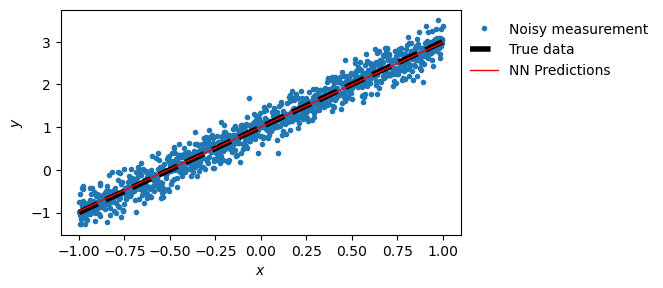

In [10]:
y_pred = y.eval(x_data)

fig, ax = plt.subplots(1,1,figsize=(8,3))
ax.plot(x_data, y_data + y_noise, '.', label='Noisy measurement')
ax.plot(x_data, y_data, '--k', lw=4, label='True data')
ax.plot(x_data, y_pred, 'r', lw=1, label='NN Predictions')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0), framealpha=0.)
plt.subplots_adjust(0.25, 0.15, 0.75, 0.9)
plt.show()

这是神经网络拟合函数的过程